In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COVIDSenti-A.csv to COVIDSenti-A.csv


In [5]:
import random

random.seed(42)

twitter_data = pd.read_csv('COVIDSenti-A.csv')

n = 27000
skiprows = sorted(
    random.sample(range(1, twitter_data.shape[0] + 1),
                  twitter_data.shape[0] - n))

twitter_data = pd.read_csv('COVIDSenti-A.csv', skiprows=skiprows)

twitter_data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [6]:
twitter_data.shape

(27000, 2)

In [7]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [8]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [9]:
twitter_data['label'].value_counts()

,count
label,
neu,20665
neg,4563
pos,1772


In [10]:
# 0-> neutral, 1-> positive 2-> negative
twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})

print(twitter_data['label'].value_counts())

label
0    20665
2     4563
1     1772
Name: count, dtype: int64


<ipython-input-10-e3ad959fbf97>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})


In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [13]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)
twitter_data.head()

,tweet,label,stemmed_content
0,Coronavirus | Human Coronavirus Types | CDC ht...,0,coronaviru human coronaviru type cdc http co i...
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",0,shehryar taseer true corona viru swine flue bi...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",2,tldr sar possibl new coronaviru difficult conf...
3,Disease outbreak news from the WHO: Middle Eas...,0,diseas outbreak news middl east respiratori sy...
4,China - Media: WSJ says sources tell them myst...,0,china media wsj say sourc tell mysteri pneumon...


In [14]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['label'].values

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(27000,) (21600,) (5400,)


In [17]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [19]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8398148148148148


In [20]:
predictions_train = model.predict(X_train)
print(accuracy_score(Y_train, predictions_train))

0.8850925925925925


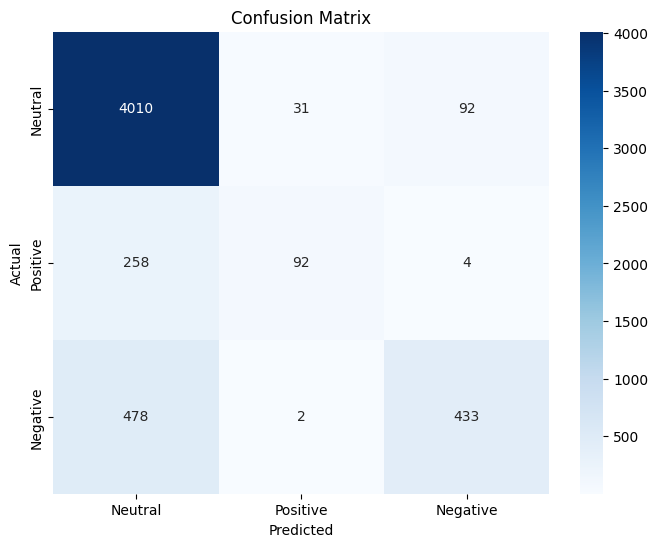

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, predictions)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(3, activation='softmax')  # Output layer with softmax for multi-class
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) # Get the class with highest probability

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7749 - loss: 0.6742 - val_accuracy: 0.8602 - val_loss: 0.4215
Epoch 2/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - accuracy: 0.9427 - loss: 0.1710 - val_accuracy: 0.8500 - val_loss: 0.4495
Epoch 3/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.9889 - loss: 0.0406 - val_accuracy: 0.8380 - val_loss: 0.5666
Epoch 4/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9977 - loss: 0.0102 - val_accuracy: 0.8403 - val_loss: 0.6682
Epoch 5/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 45s 74ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.8398 - val_loss: 0.7441
Epoch 6/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 50s 82ms/step - accuracy: 0.9999 - loss: 9.5896e-04 - val_accuracy: 0.8431 - val_loss: 0.8078
Epoch 7/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 1.0000 - loss: 3.3734e-04 - val_accuracy: 0.8394 - val_loss: 0.8563
Epoch 8/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 1.0000 - loss: 1

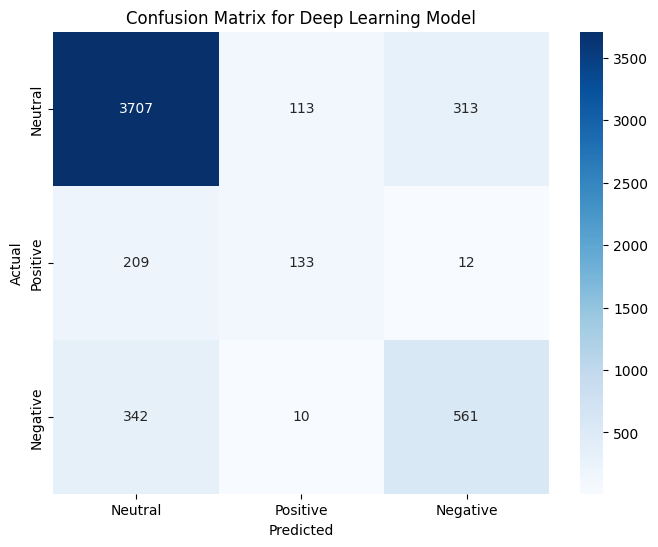

In [23]:
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

SVM Accuracy: 0.8668518518518519


Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

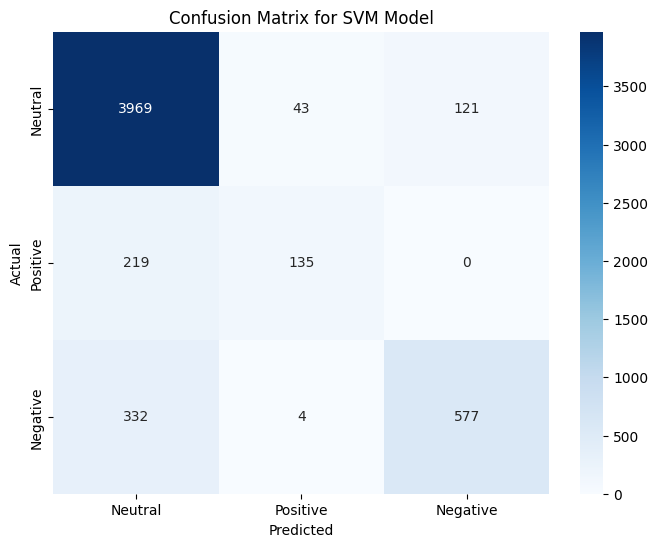

In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
svm_cm = confusion_matrix(Y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')

Using lemmatization instead of Stemming


In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
def lemmatization(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [29]:
twitter_data['lemmed_content'] = twitter_data['tweet'].apply(lemmatization)
twitter_data.head()

,tweet,label,stemmed_content,lemmed_content
0,Coronavirus | Human Coronavirus Types | CDC ht...,0,coronaviru human coronaviru type cdc http co i...,coronavirus human coronavirus type cdc http co...
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",0,shehryar taseer true corona viru swine flue bi...,shehryar taseer true corona virus swine flue b...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",2,tldr sar possibl new coronaviru difficult conf...,tldr sars possibly new coronavirus difficult c...
3,Disease outbreak news from the WHO: Middle Eas...,0,diseas outbreak news middl east respiratori sy...,disease outbreak news middle east respiratory ...
4,China - Media: WSJ says sources tell them myst...,0,china media wsj say sourc tell mysteri pneumon...,china medium wsj say source tell mystery pneum...


In [30]:
X_lem = twitter_data['lemmed_content'].values
Y_lem = twitter_data['label'].values

In [31]:
X_train_lem, X_test_lem, Y_train_lem, Y_test_lem = train_test_split(X_lem,Y_lem, test_size=0.2, stratify=Y, random_state=2)

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_lem)

X_train_lem = vectorizer.transform(X_train_lem)
X_test_lem = vectorizer.transform(X_test_lem)

In [33]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_lem, Y_train_lem)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [34]:
predictions_lem = model.predict(X_test_lem)
print(accuracy_score(Y_test_lem, predictions_lem))


0.8444444444444444


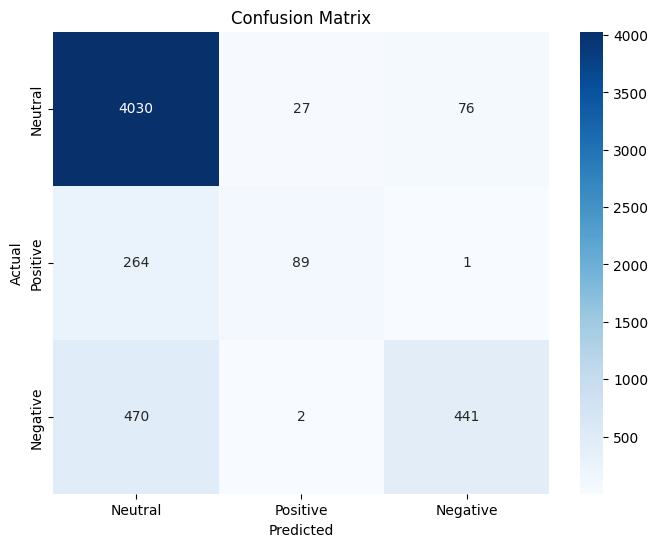

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test_lem, predictions_lem)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()